In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ..

/Share/home/shibinbin/projects/Deepfold2


In [17]:
import pandas as pd
from sklearn.metrics import roc_auc_score

/dev/shm/shibinbin/anaconda2/lib/python2.7/site-packages/numexpr/cpuinfo.py:42: UserWarning: [Errno 2] No such file or directory
  warnings.warn(str(e), UserWarning, stacklevel=stacklevel)


In [3]:
import h5py
predictions = {}
with h5py.File('output/Known/icSHAPE/Spitale_2015_invitro/r=all,w=128,m=fcn1,reg=1', 'r') as f:
    for seqname in f.keys():
        g = f[seqname]
        predictions[seqname] = {}
        for key in g.keys():
            predictions[seqname][key] = g[key][:]

In [4]:
len(predictions)

540

In [5]:
predictions.keys()[:10]

[u'tRNA_tdbR00000053-Bos_taurus-9913-Glu-NUC',
 u'srp_Guil.thet._AF041468',
 u'grp1_a.I1.c.N.tabacum.C3.tLEU',
 u'tmRNA_Ther.teng._AE013063_1-351',
 u'RNaseP_S.solfataricus',
 u'tmRNA_Trem.prin._AF481102_1-264',
 u'srp_Aspe.oryz._AP007169',
 u'grp2_a.I2.c.N.tabacum.A.trnI.i1',
 u'tRNA_tdbR00000125-Bos_taurus-9913-Gly-UCC',
 u'16s_M.polymorpha_domain4']

In [8]:
rna_types = [seqname.split('_')[0] for seqname in predictions.keys()]

In [14]:
predictions['srp_Guil.thet._AF041468']['true_labels']

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0], dtype=int32)

In [23]:
roc_auc_scores = []
for seqname in predictions.keys():
    rna_type = seqname.split('_')[0]
    if np.all(predictions[seqname]['true_labels'] == 0):
        pass
        #roc_auc_scores.append((seqname, rna_type, np.nan))
    else:
        roc_auc_scores.append((seqname, rna_type, 
                               roc_auc_score(predictions[seqname]['true_labels'],
                              -predictions[seqname]['predicted_values'])))
roc_auc_scores = pd.DataFrame.from_records(roc_auc_scores,
                                           columns=['seqname', 'rna_type', 'roc_auc'])
roc_auc_scores.head(10)

,seqname,rna_type,roc_auc
0,tRNA_tdbR00000053-Bos_taurus-9913-Glu-NUC,tRNA,0.491071
1,srp_Guil.thet._AF041468,srp,0.529617
2,grp1_a.I1.c.N.tabacum.C3.tLEU,grp1,0.599092
3,tmRNA_Ther.teng._AE013063_1-351,tmRNA,0.656529
4,RNaseP_S.solfataricus,RNaseP,0.671313
5,tmRNA_Trem.prin._AF481102_1-264,tmRNA,0.603041
6,srp_Aspe.oryz._AP007169,srp,0.498894
7,grp2_a.I2.c.N.tabacum.A.trnI.i1,grp2,0.525456
8,tRNA_tdbR00000125-Bos_taurus-9913-Gly-UCC,tRNA,0.401786
9,srp_Proc.mari._CP000111,srp,0.550379


In [27]:
roc_table = roc_auc_scores.pivot_table('roc_auc', 'rna_type')
roc_table.to_csv('tmp/roc_table.regression.csv')
roc_table

,roc_auc
rna_type,
16s,0.590955
23s,0.690551
5s,0.555387
RNaseP,0.640245
grp1,0.589844
grp2,0.571260
srp,0.566317
tRNA,0.544616
telomerase,0.575275


In [ ]:
roc_table.to_csv('')

tRNA_tdbR00000053-Bos_taurus-9913-Glu-NUC


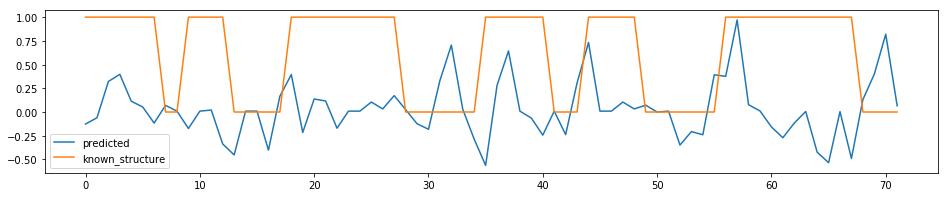

In [25]:
seqname = predictions.keys()[0]
print seqname
fig, ax = subplots(figsize=(16, 3))
ax.plot(-predictions[seqname]['predicted_values'], label='predicted')
ax.plot(predictions[seqname]['true_labels'], label='known_structure')
ax.legend()

srp_Guil.thet._AF041468


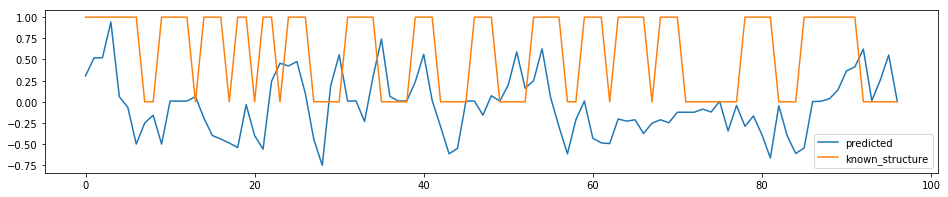

In [26]:
seqname = predictions.keys()[1]
print seqname
fig, ax = subplots(figsize=(16, 3))
ax.plot(-predictions[seqname]['predicted_values'], label='predicted')
ax.plot(predictions[seqname]['true_labels'], label='known_structure')
ax.legend()

In [18]:
predictions[seqname].keys()

[u'predicted_labels', u'true_labels', u'predicted_values', u'sequence']

In [25]:
predicted_values = np.concatenate([predictions[seqname]['predicted_values'] for seqname in predictions.keys()])
true_labels = np.concatenate([predictions[seqname]['true_labels'] for seqname in predictions.keys()])

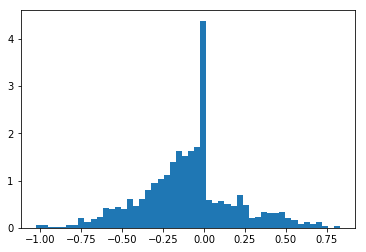

In [26]:
h = hist(predicted_values, bins=50, normed=True)

In [29]:
from scipy.stats import pearsonr
print(pearsonr(-predicted_values, true_labels))

(0.16947936792234319, 0.0)
